In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy.io import loadmat
import matplotlib as mpl
from  matplotlib import cm
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
data = loadmat('Salinas_corrected.mat')['salinas_corrected']
label = loadmat('Salinas_gt.mat')['salinas_gt']

global GROUND_TRUTH
global NUM_CLASSES
GROUND_TRUTH = ['Background', 'Brocoli_green_weeds_1', 'Brocoli_green_weeds_2', 'Fallow', 'Fallow_rough_plow',
                        'Fallow_smooth', 'Stubble', 'Celery', 'Grapes_untrained', 'Soil_vinyard_develop',
                        'Corn_senesced_green_weeds', 'Lettuce_romaine_4wk', 'Lettuce_romaine_5wk',
                        'Lettuce_romaine_6wk', 'Lettuce_romaine_7wk', 'Vinyard_untrained', 'Vinyard_vertical_trellis']

NUM_CLASSES = len(GROUND_TRUTH) - 1
data_reshaped = data.reshape(-1, data.shape[-1])
label_reshaped = label.flatten()

# Dataset Description

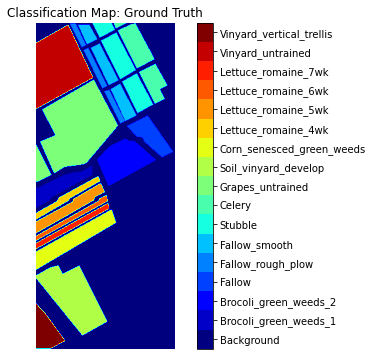

In [3]:
def display_class(data, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap='jet')
    plt.title('Classification Map: ' + title)
    cbar = plt.colorbar(boundaries=(np.arange(NUM_CLASSES + 2) - 0.5))
    cbar.set_ticks(np.arange(NUM_CLASSES + 1))
    cbar.set_ticklabels(GROUND_TRUTH)
    plt.axis('off')
    
display_class(label, 'Ground Truth')


In [4]:
classes = pd.DataFrame(columns=['label', 'name', 'samples'])
for sample in label_reshaped:
    if not any(classes.label == sample):
        classes.loc[len(classes)] = [sample, GROUND_TRUTH[sample], 1]
    else:
        classes['samples'].loc[classes.loc[classes.label == sample].index[0]] += 1
classes = classes.sort_values(by=['label']).reset_index(drop=True)
classes

,label,name,samples
0,0,Background,56975
1,1,Brocoli_green_weeds_1,2009
2,2,Brocoli_green_weeds_2,3726
3,3,Fallow,1976
4,4,Fallow_rough_plow,1394
5,5,Fallow_smooth,2678
6,6,Stubble,3959
7,7,Celery,3579
8,8,Grapes_untrained,11271
9,9,Soil_vinyard_develop,6203


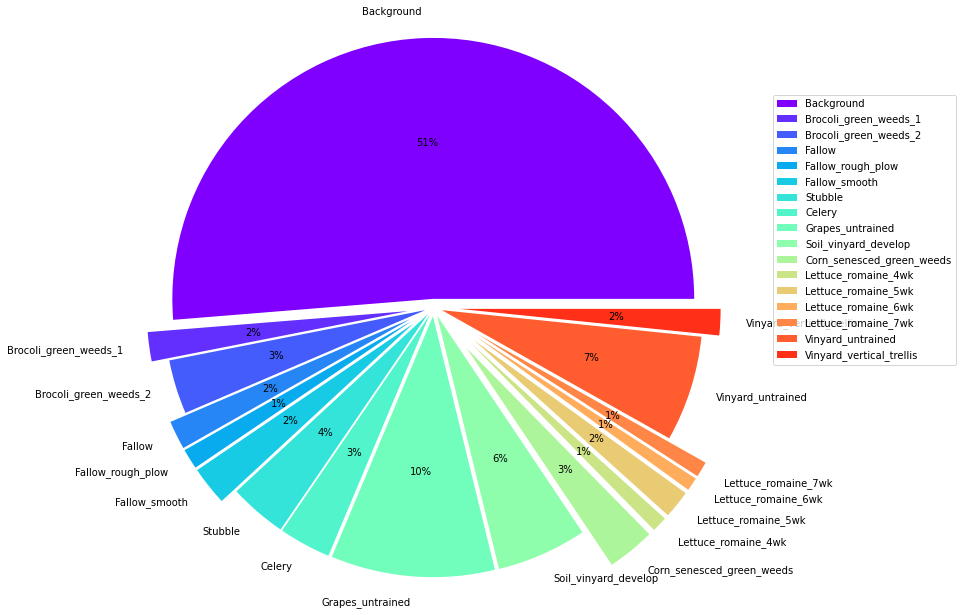

In [5]:
explode=(0.1,0.3,0.1,0.3,0.3,0.3,0.1,0.1,0.1,0.1,0.6,0.6,0.6,0.6,0.6,0.1,0.3)
colors = cm.rainbow(np.arange(len(classes))/len(classes))
plt.gca().axis("equal")
patches, texts, autotexts = plt.pie(classes['samples'], labels=classes['name'],explode=explode,wedgeprops={'linewidth':5},radius=3,autopct='%.f%%',colors=colors)
proptease = fm.FontProperties()
proptease.set_size('medium')

plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.legend(GROUND_TRUTH, bbox_to_anchor=(1.5,1.5), loc="upper left")
plt.show()

# Feature Visualization

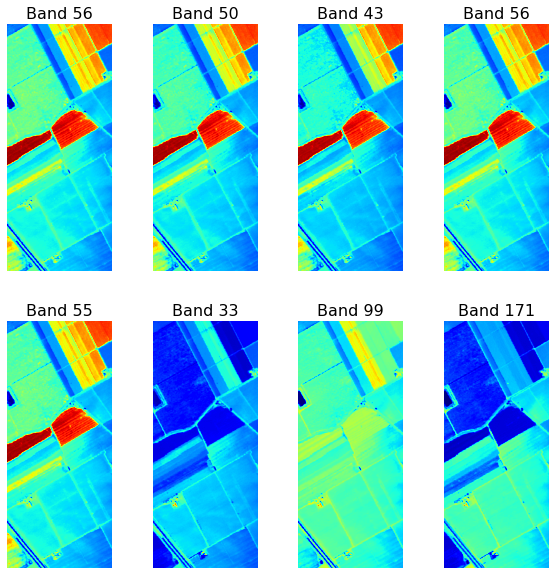

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    band = random.randint(0, data.shape[-1])
    ax.set_title(f"Band {band}", fontsize=16)
    plt.imshow(data[:, :, band], cmap='jet')
    plt.axis('off')

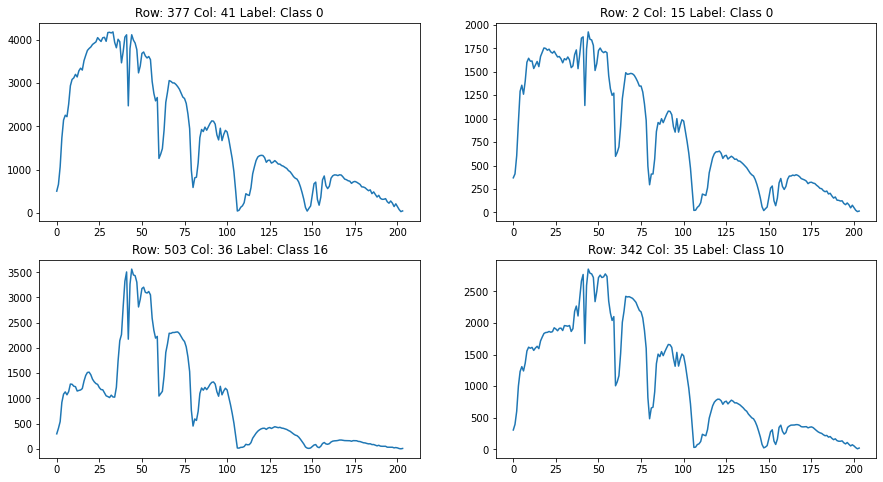

In [7]:
fig = plt.figure(figsize=(15,8))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    row = random.randint(0, data.shape[0])
    col = random.randint(0, data.shape[1])
    ax.set_title(f"Row: {row} Col: {col} Label: Class {label[row, col]}")
    plt.plot(data[row, col, :])

/home/r15user4/Environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/r15user4/Environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<Figure size 432x288 with 0 Axes>

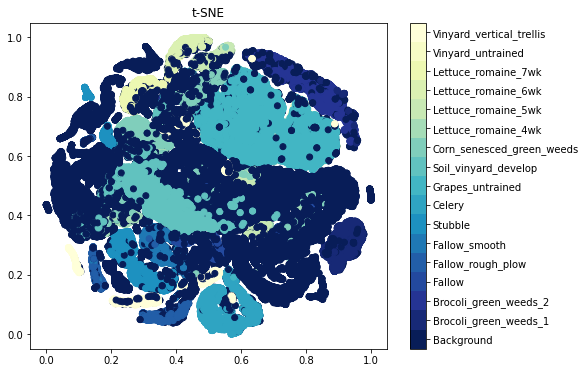

In [8]:
# tsne降维可视化
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
 
    fig = plt.figure()
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], marker='o', c=label, cmap='YlGnBu_r')
    # plt.colorbar()
    cbar = plt.colorbar(boundaries=(np.arange(NUM_CLASSES + 2) - 0.5))
    cbar.set_ticks(np.arange(NUM_CLASSES + 1))
    cbar.set_ticklabels(GROUND_TRUTH)
    plt.title(title)
    return fig

tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(data_reshaped) 

fig = plot_embedding(tsne_result, label_reshaped, 't-SNE')
plt.show(fig)


/home/r15user4/Environment/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


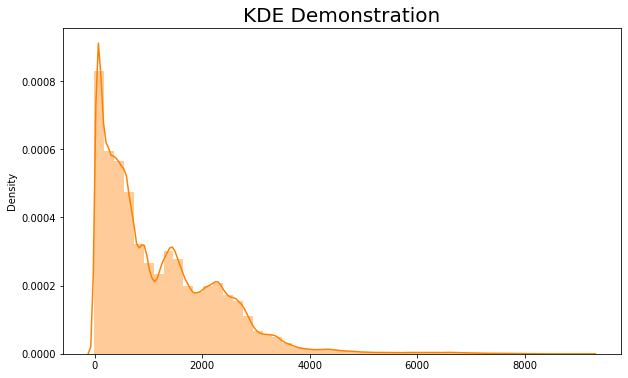

In [9]:
sns.set_palette("hls")
mpl.rc("figure", figsize=(10, 6))
plt.title("KDE Demonstration", fontsize=20)
sns.distplot(data, color="#ff8000")
plt.show()

/home/r15user4/Environment/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/r15user4/Environment/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


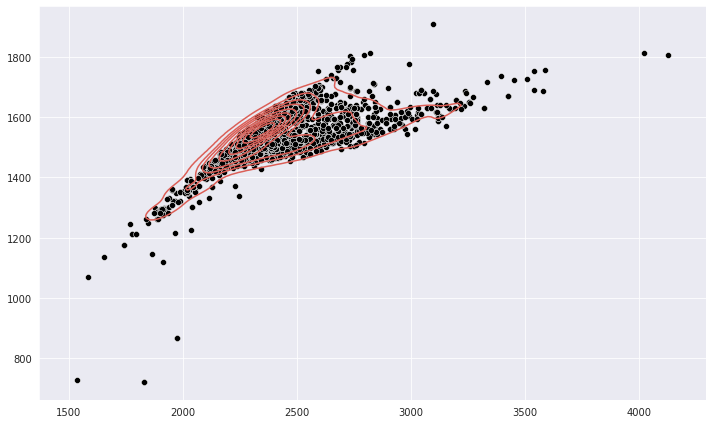

In [10]:
sns.set_style('darkgrid')
class_index = 10
c1_feature1 = data[:,:,56][np.where(label==class_index)]
c1_feature2 = data[:,:,100][np.where(label==class_index)]
sns.kdeplot(c1_feature1, c1_feature2)
sns.scatterplot(c1_feature1, c1_feature2, color='black')
plt.tight_layout();